### Distribución normal 

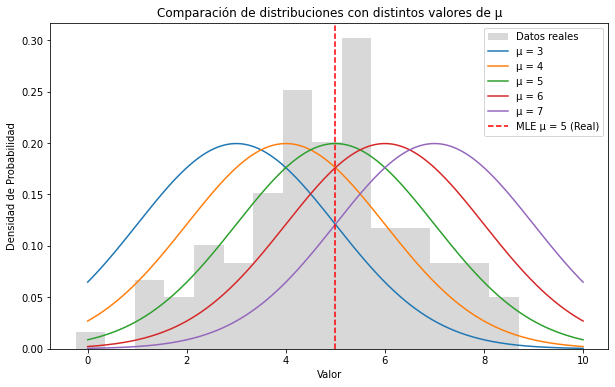

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generamos datos de una normal con media 5 y desviación estándar 2
np.random.seed(42)
mu_real, sigma_real = 5, 2
datos = np.random.normal(mu_real, sigma_real, 100)  # 100 muestras

# Definimos diferentes valores de μ para comparar
mu_values = [3, 4, 5, 6, 7]  # Algunos incorrectos, uno correcto (5)

# Rango para graficar
x = np.linspace(0, 10, 1000)

# Histograma de los datos reales
plt.figure(figsize=(10,6))
plt.hist(datos, bins=15, density=True, alpha=0.3, color='gray', label="Datos reales")

# Graficamos las distribuciones con distintos μ
for mu in mu_values:
    pdf = norm.pdf(x, mu, sigma_real)  # Función de densidad de probabilidad
    plt.plot(x, pdf, label=f"μ = {mu}")

# Configuración de la gráfica
plt.axvline(mu_real, color='red', linestyle="--", label="MLE μ = 5 (Real)")
plt.xlabel("Valor")
plt.ylabel("Densidad de Probabilidad")
plt.title("Comparación de distribuciones con distintos valores de μ")
plt.legend()
plt.show()


# **Máxima Verosimilitud (MLE)**  

La **Máxima Verosimilitud (MLE)** es un método estadístico para estimar los parámetros de una distribución **maximizando la probabilidad de los datos observados**.  

## **Definición Matemática**  

Dado un conjunto de datos $( X = \{x_1, x_2, ..., x_n\})$ que siguen una distribución con parámetro desconocido $\theta$, la función de verosimilitud se define como:  

$$
L(\theta) = P(X | \theta) = \prod_{i=1}^{n} f(x_i | \theta)
$$  

donde $f(x_i | \theta)$ es la función de densidad de probabilidad (PDF) o función de masa de probabilidad (PMF) de los datos.  

El **estimador de máxima verosimilitud** $\hat{\theta}$ es aquel que **maximiza** esta función:

$$
\hat{\theta} = \arg\max_{\theta} L(\theta)
$$

## ** Log-Verosimilitud**  

Para simplificar los cálculos, usualmente trabajamos con la **log-verosimilitud**:

$$
\log L(\theta) = \sum_{i=1}^{n} \log f(x_i | \theta)
$$

Maximizar $L(\theta))$ es equivalente a maximizar $log(L(\theta))$.


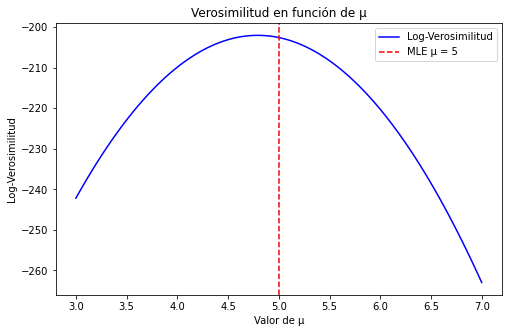

In [2]:

# Generamos datos de una normal con media 5 y desviación estándar 2
np.random.seed(42)
mu_real, sigma_real = 5, 2
datos = np.random.normal(mu_real, sigma_real, 100)  # 100 muestras

# Definimos un rango de valores para μ
mu_values = np.linspace(3, 7, 100)

# Calculamos la log-verosimilitud para cada μ
log_likelihoods = [
    np.sum(norm.logpdf(datos, loc=mu, scale=sigma_real)) for mu in mu_values
]

# Graficamos la log-verosimilitud en función de μ
plt.figure(figsize=(8,5))
plt.plot(mu_values, log_likelihoods, color="blue", label="Log-Verosimilitud")
plt.axvline(mu_real, color='red', linestyle="--", label=f"MLE μ = {mu_real}")
plt.xlabel("Valor de μ")
plt.ylabel("Log-Verosimilitud")
plt.title("Verosimilitud en función de μ")
plt.legend()
plt.show()


# **Máxima Verosimilitud y Regresión Lineal (OLS)**

Dado un modelo de regresión lineal:

$$
y = \theta^T X + \epsilon
$$

Donde el **error $\epsilon$** sigue una distribución normal:

$$
\epsilon \sim \mathcal{N}(0, \sigma^2)
$$

Entonces, la **distribución condicional de \( y \) dado \( X \)** es:

$$
y | X; \theta \sim \mathcal{N}(\theta^T X, \sigma^2)
$$

### Función de Verosimilitud

Dado un conjunto de datos $(X_i, y_i)$ con \( i = 1, $\dots$, m \), la **función de verosimilitud** es:

$$
L(\theta, \sigma^2) = \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \theta^T X_i)^2}{2\sigma^2}\right)
$$

Tomamos el **logaritmo de la verosimilitud**:

$$
\log L(\theta, \sigma^2) = \sum_{i=1}^{m} \left( -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(y_i - \theta^T X_i)^2}{2\sigma^2} \right)
$$

### **Relación con OLS**  

Para **maximizar la verosimilitud respecto a $\theta$ **, ignoramos términos constantes:

$$
\max_{\theta} \sum_{i=1}^{m} -\frac{(y_i - \theta^T X_i)^2}{2\sigma^2}
$$

Esto equivale a **minimizar el error cuadrático**:

$$
\min_{\theta} \sum_{i=1}^{m} (y_i - \theta^T X_i)^2
$$


**Conclusión:** Minimizar el error cuadrático con **OLS** es lo mismo que **maximizar la verosimilitud** bajo una **distribución normal de los errores**.
